# Heart Disease Analysis Project
Heart disease is one of the leading causes of death worldwide, and it's important to understand the risk factors and early warning signs. In this project, I used a dataset containing information about various health-related factors, such as age, sex, cholesterol levels, blood sugar levels, and heart rate, to investigate the relationship between these factors and heart disease. I used various data visualization techniques and statistical methods to explore the data and gain insights into the risk factors for heart disease. The goal of this project is to gain a deeper understanding of heart disease and its risk factors, which can help with early detection and prevention.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv ('C:/Users/euzoe/OneDrive/Desktop/DATA_ANALYSIS/DATASETS/heart.csv')
df

,age,sex,sex_def,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_def
0,63,1,male,3,145,233,1,0,150,0,2.3,0,0,1,1,yes
1,37,1,male,2,130,250,0,1,187,0,3.5,0,0,2,1,yes
2,41,0,female,1,130,204,0,0,172,0,1.4,2,0,2,1,yes
3,56,1,male,1,120,236,0,1,178,0,0.8,2,0,2,1,yes
4,57,0,female,0,120,354,0,1,163,1,0.6,2,0,2,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,female,0,140,241,0,1,123,1,0.2,1,0,3,0,no
299,45,1,male,3,110,264,0,1,132,0,1.2,1,0,3,0,no
300,68,1,male,0,144,193,1,1,141,0,3.4,1,2,3,0,no
301,57,1,male,0,130,131,0,1,115,1,1.2,1,1,3,0,no


# 1. Explore the relationship between age, sex, and heart disease (target) by creating.

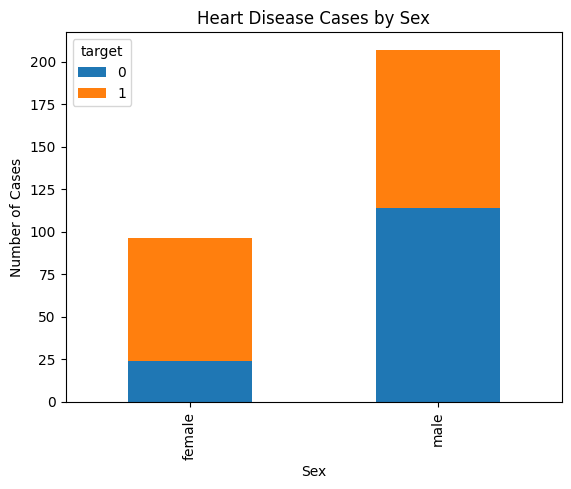

In [2]:
# Replace values in the 'sex' column
df["sex"] = df["sex"].replace({1: "male", 0: "female"})

# Create a bar chart to show the number of heart disease cases by sex
df.groupby("sex")["target"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.xlabel("Sex")
plt.ylabel("Number of Cases")
plt.title("Heart Disease Cases by Sex")
plt.show()


# 2. Analyzing the distribution of cholesterol levels (chol) and blood sugar levels (fbs) among those with and without heart disease.

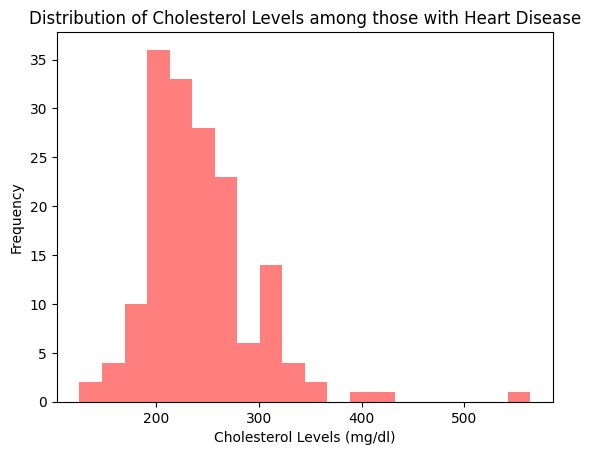

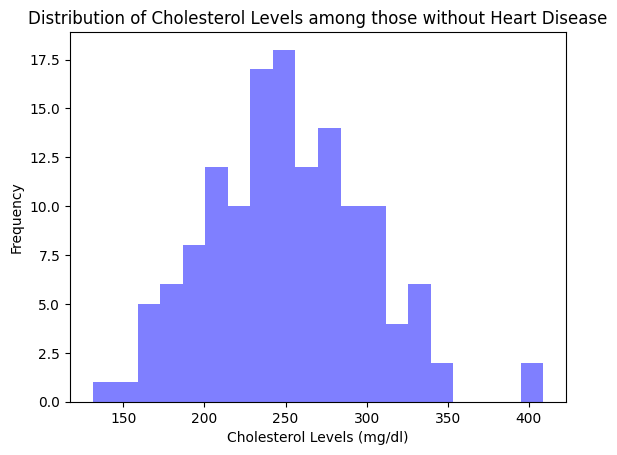

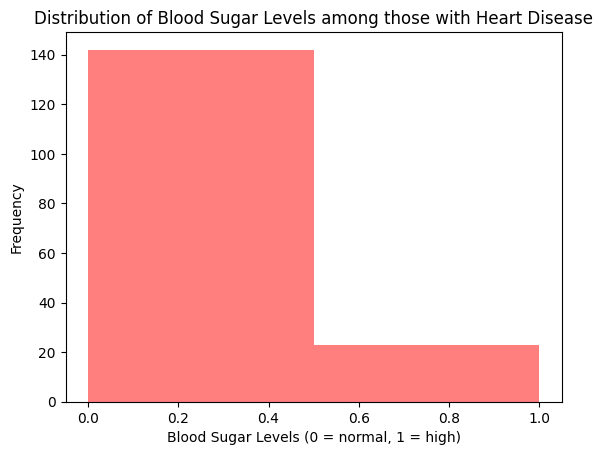

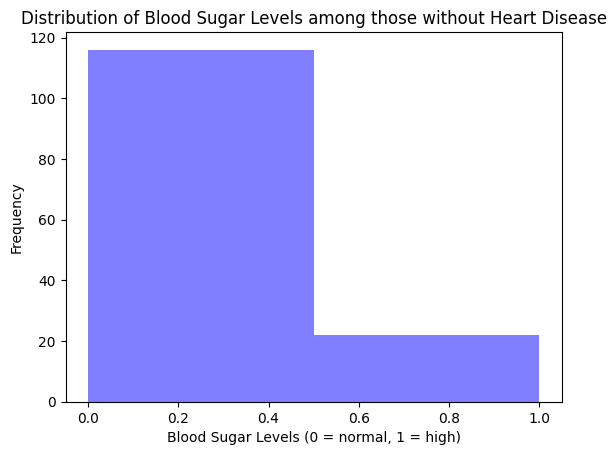

In [3]:
# Create a histogram to show the distribution of cholesterol levels among those with heart disease
df[df["target"] == 1]["chol"].plot(kind="hist", bins=20, color="red", alpha=0.5)
plt.xlabel("Cholesterol Levels (mg/dl)")
plt.ylabel("Frequency")
plt.title("Distribution of Cholesterol Levels among those with Heart Disease")
plt.show()

# Create a histogram to show the distribution of cholesterol levels among those without heart disease
df[df["target"] == 0]["chol"].plot(kind="hist", bins=20, color="blue", alpha=0.5)
plt.xlabel("Cholesterol Levels (mg/dl)")
plt.ylabel("Frequency")
plt.title("Distribution of Cholesterol Levels among those without Heart Disease")
plt.show()

# Create a histogram to show the distribution of blood sugar levels among those with heart disease
df[df["target"] == 1]["fbs"].plot(kind="hist", bins=2, color="red", alpha=0.5)
plt.xlabel("Blood Sugar Levels (0 = normal, 1 = high)")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Sugar Levels among those with Heart Disease")
plt.show()

# Create a histogram to show the distribution of blood sugar levels among those without heart disease
df[df["target"] == 0]["fbs"].plot(kind="hist", bins=2, color="blue", alpha=0.5)
plt.xlabel("Blood Sugar Levels (0 = normal, 1 = high)")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Sugar Levels among those without Heart Disease")
plt.show()


# 3. Investigate any potential correlations between resting blood pressure (trestbps), maximum heart rate achieved (thalach), and heart disease.

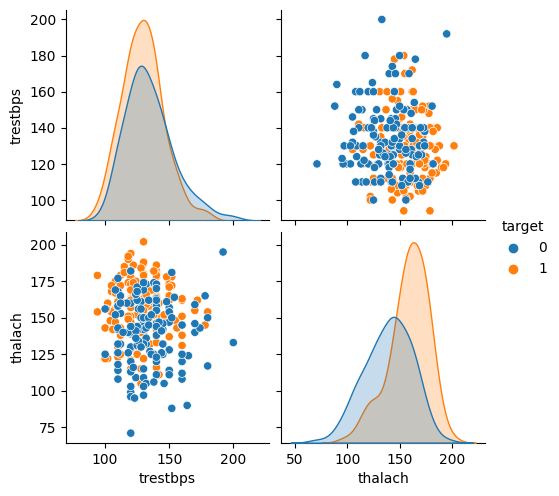

In [4]:
import seaborn as sns
# Create a scatter plot matrix to show the relationship between trestbps, thalach and heart disease
sns.pairplot(df, vars=["trestbps", "thalach"], hue="target")
plt.show()


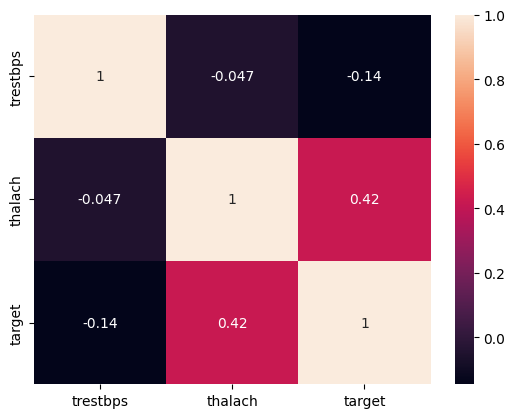

In [5]:
# Calculate the correlation matrix
corr = df[["trestbps", "thalach", "target"]].corr()

# Create a heatmap from the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


# 4. Relationship between age and heart disease in male and female 

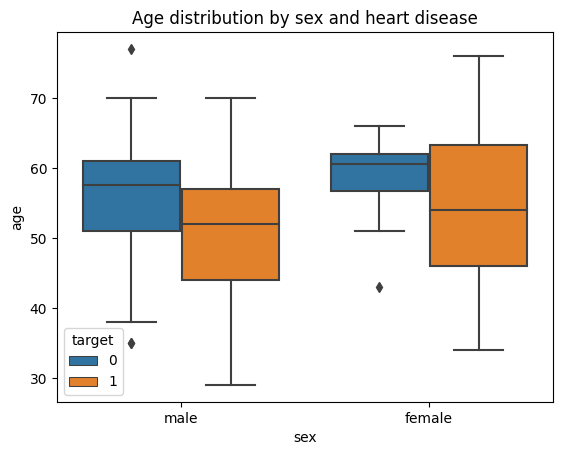

In [8]:
# Boxplot
sns.boxplot(x='sex', y='age', hue='target', data=df)
plt.title("Age distribution by sex and heart disease")
plt.show()

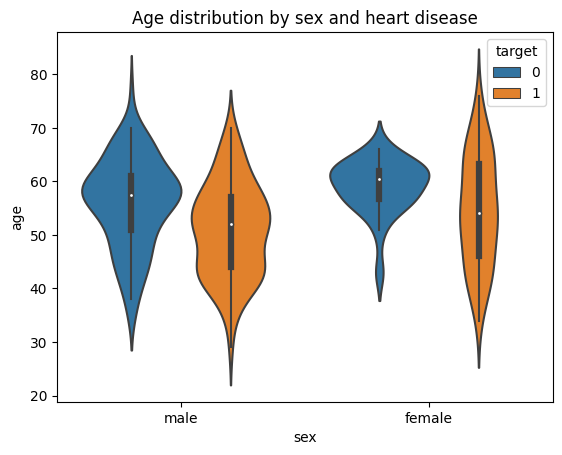

In [9]:
# Violin plot
sns.violinplot(x='sex', y='age', hue='target', data=df)
plt.title("Age distribution by sex and heart disease")
plt.show()

# 5. What is the relationship between cholesterol level and heart disease?

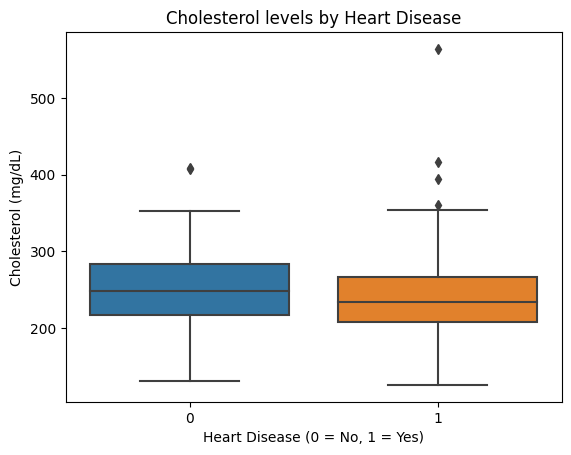

In [11]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol levels by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

In [12]:
df[['chol','target']].corr()

,chol,target
chol,1.000000,-0.085239
target,-0.085239,1.000000


# 6. Correlation between all the features

C:\Users\euzoe\AppData\Local\Temp\ipykernel_29884\2809314575.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


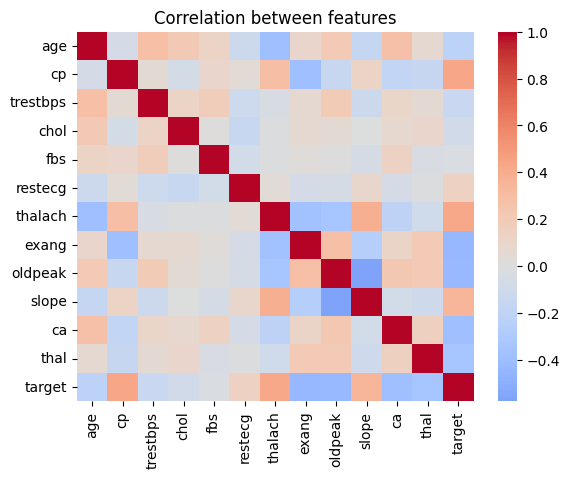

In [13]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot = False, cmap='coolwarm', center = 0)
plt.title("Correlation between features")
plt.show()

# 7. What is the distribution of heart disease cases by maximum heart rate achieved?

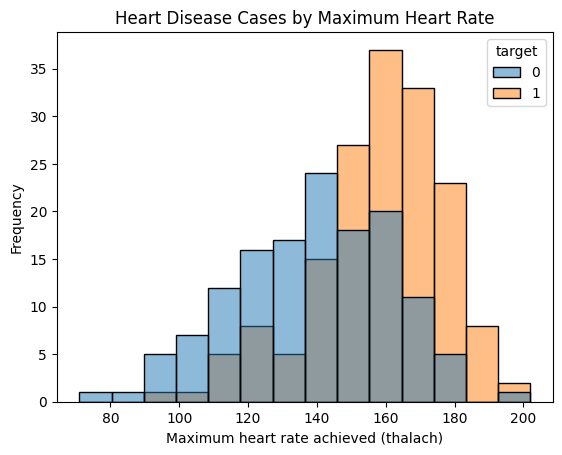

In [14]:
sns.histplot(data = df, x = 'thalach', hue = 'target')
plt.xlabel("Maximum heart rate achieved (thalach)")
plt.ylabel("Frequency")
plt.title("Heart Disease Cases by Maximum Heart Rate")
plt.show()

# 8. What is the relationship between exercise-induced angina (exang) and heart disease?

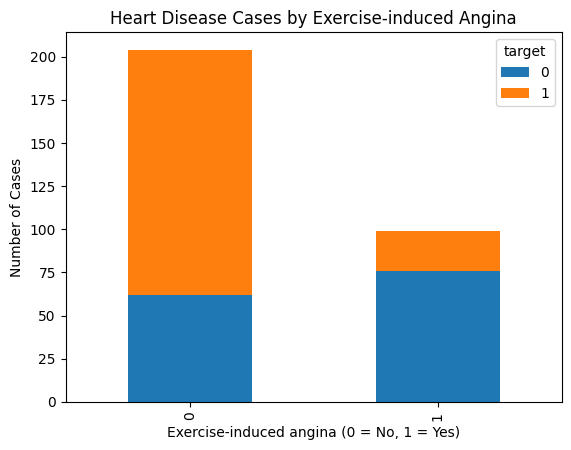

In [15]:
df.groupby("exang")["target"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.xlabel("Exercise-induced angina (0 = No, 1 = Yes)")
plt.ylabel("Number of Cases")
plt.title("Heart Disease Cases by Exercise-induced Angina")
plt.show()

# 9. What is the relationship between the slope of the exeercise ST segment (slope) and heart disease?

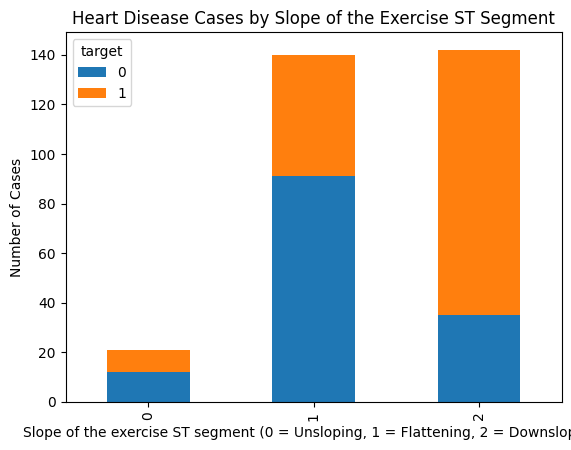

In [16]:
df.groupby("slope")["target"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.xlabel("Slope of the exercise ST segment (0 = Unsloping, 1 = Flattening, 2 = Downsloping)")
plt.ylabel("Number of Cases")
plt.title("Heart Disease Cases by Slope of the Exercise ST Segment")
plt.show()

# 10. Relationship between ST depression induced by exercise relative to rest (oldpeak) and heart disease?

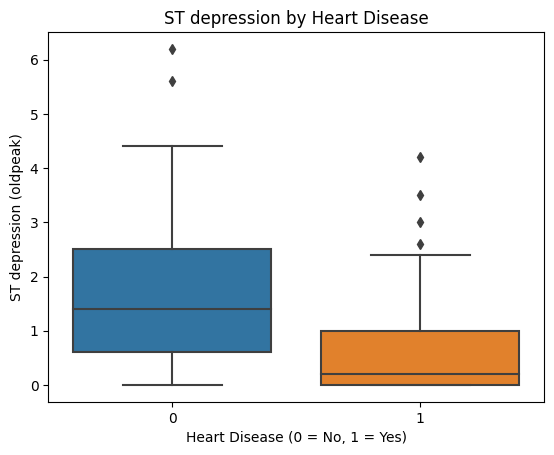

In [17]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("ST depression by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("ST depression (oldpeak)")
plt.show()